## Performing gradient descent in regression


In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = np.random.randn(500, 2)

In [15]:
print(data[0])

[0.69194531 0.04349838]


In [14]:
print(data[0,0])


0.6919453093067194


In [9]:
print(data[0,1])

0.04349838362157686


In [17]:
theta = np.zeros(2)
print(theta)

[0. 0.]


In [20]:
def loss_function(data,theta):
  m = theta[0]
  b = theta[1]
  loss = 0
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]

    y_hat = (m*x + b)

    loss = loss + ((y - (y_hat)) ** 2)

  mse = loss / float(len(data))
  return mse

In [21]:
loss_function(data, theta)

1.0516253917905247

In [23]:
def compute_gradients(data, theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]

  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
    gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon)
  return gradients

In [24]:
compute_gradients(data,theta)

array([6.81499004e-06, 8.47142844e-05])

In [26]:
num_iterations = 50000
loss = []
lr = 1e-2

In [27]:
for t in range(num_iterations):

  #compute gradients
  gradients = compute_gradients(data, theta)

  #update parameter
  theta = theta - (lr*gradients)

  #store the loss
  loss.append(loss_function(data,theta))

Text(0.5, 1.0, 'Gradient Descent')

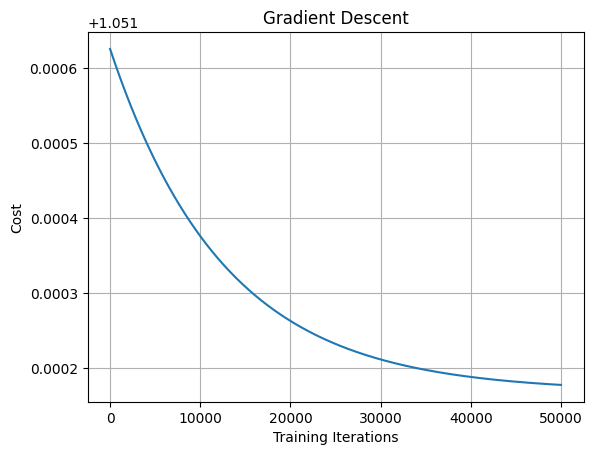

In [28]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

## Gradient descent versus stochastic gradient descent


In [30]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):

  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))

  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)

    sample_data = data[0:sample_size[0], :]

    grad = compute_gradients(sample_data, theta)
    theta = theta - (lr * grad)

  return theta

## Momentum based gradient descent

In [32]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])

  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    vt = gamma * vt + lr * gradients
    theta = theta - vt

  return theta

## Nesterov accelerated gradient

In [33]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])

  for t in range(num_iterations):
    gradients = compute_gradients(data, theta - gamma * vt)
    vt = gamma * vt + lr * gradients
    theta = theta - vt

  return theta

## Adaptive method of gradient descent

In [34]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
  gradients_sum = np.zeros(theta.shape[0])

  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    gradients_sum += gradients ** 2
    gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    theta = theta - (lr * gradient_update)

  return theta